In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import sympy as sym

import payoffs
import selection_functions

In [2]:
%matplotlib inline
plt.style.use("ggplot")
mpld3.enable_notebook()

# Monomorphic gamma model

In [3]:
class U(sym.Function):
    """Generic matching function"""
    
    is_real = True
    
    @classmethod
    def eval(cls, x):
        """We require the U(0)=0 and U(1)=1"""
        if x.is_Number and x is sym.S.Zero:
            return sym.S.Zero
        elif x.is_Number and x is sym.S.One:
            return sym.S.One

        
class UGA(U):
    """Matching function for G males."""
    

class UgA(U):
    """Matching function for g males."""


In [4]:
x1, x2, x3 = sym.symbols('x1, x2, x3')
T, R, P, S = sym.symbols('T, R, P, S')


In [5]:
def N(x1, x2, x3, UGA, UgA, T, R, P, S):
    out = (
           2 * R *((x1 + x2) * UGA(x1 + x3)**2 + (1 - (x1 + x2)) * UgA(x1 + x3)**2) +
           2 * P * ((x1 + x2) * (1 - UGA(x1 + x3))**2 + (1 - (x1 + x2)) * (1 - UgA(x1 + x3))**2) +
           2 * (S + T) * ((x1 + x2) * UGA(x1 + x3) * (1 - UGA(x1 + x3)) + (1 - (x1 + x2)) * UgA(x1 + x3) * (1 - UgA(x1 + x3)))
          )
    return out

In [6]:
def equation_motion_GA_share(x1, x2, x3, UGA, UgA, T, R, P, S):
    numerator = (
                 x1 * UGA(x1 + x3)**2 * (1) * x1 / (x1 + x3) * 2*R +  
                 x1 * UGA(x1 + x3)**2 * (1/2) * x3 / (x1 + x3) * 2*R +

                 x1 * (1 - UGA(x1 + x3))**2 * (1/2) * x2 / (1 - x1 - x3) * 2*P +
                 x1 * (1 - UGA(x1 + x3))**2 * (1/4) * (1 - x1 - x2 - x3) / (1 - x1 - x3) * 2*P +

                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1) * x1 / (x1 + x3) * S +
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x3 / (x1 + x3) * S + 
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x2 / (1 - x1 - x3) * T +
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/4) * (1 - x1 - x2 - x3) / (1 - x1 - x3) * T +

                 x2 * UGA(x1 + x3)**2 * (1/2) * x1 / (x1 + x3) * 2*R + 
                 x2 * UGA(x1 + x3)**2 * (1/4) * x3 / (x1 + x3) * 2*R +

                 x2 * (1 - UGA(x1 + x3))**2 * (0) +

                 x2 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x1 / (x1 + x3) * S +
                 x2 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/4) * x3 / (x1 + x3) * S +

                 x3 * UgA(x1 + x3)**2 * (1/2) * x1 / (x1 + x3) * 2*R +

                 x3 * (1 - UgA(x1 + x3))**2 * (1/4) * x2 / (1 - x1 - x3) * 2* P +

                 x3 * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/2) * x1 / (x1 + x3) * S +
                 x3 * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/4) * x2 / (1 - x1 - x3) * T +

                 (1 - x1 - x2 - x3) * UgA(x1 + x3)**2 * (1/4) * x1 / (x1 + x3) * 2*R +

                 (1 - x1 - x2 - x3) * (1 - UgA(x1 + x3))**2 * (0) +

                 (1 - x1 - x2 - x3) * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/4) * x1 / (x1 + x3) * S
                 )

    x1_dot = (numerator / N(x1, x2, x3, UGA, UgA, T, R, P, S)) - x1
    return x1_dot


In [7]:
f = equation_motion_GA_share(x1, 1-x1, 0, UGA, UgA, T, R, P, S)

In [8]:
f

-x1 + (1.0*P*x1*(-UGA(x1) + 1)**2 + 2*R*x1*UGA(x1)**2 + 1.0*R*(-x1 + 1)*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*UGA(x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*UGA(x1))/(2*P*(-UGA(x1) + 1)**2 + 2*R*UGA(x1)**2 + (2*S + 2*T)*(-UGA(x1) + 1)*UGA(x1))

## The locus of potential equilibria (LPE)

Setting the equation of motion equal to zero, rearranging the resulting equation yields the locus of potential equilibria (LPE). The LPE represents, for each possible $x_1$, the value that $U_{GA}$ would have to take in order for that $x_1$ to be an equilbrium. 

\begin{align}
  L(x^*) \equiv x^* - \left(\frac{\big(R - S\big)U_{GA}^{*2} + SU_{GA}}{P + \big((T + S) - 2P\big)U_{GA}^* + \big((P + R) - (T + S)\big)U_{GA}^{*2}}\right) = 0\\
\end{align}

We already know that $x^*=0, U_{GA}^*=0$ and $x^*=1, U_{GA}^*=1$ are equilibria, so it follows that $L(0)=0$ and $L(1)=0$.


In [10]:
# solving for the LPE using Python
UGA_star, UGA_prime_star = sym.symbols("UGA_star, UGA_prime_star")
x1_star, = sym.solve(f, x1, implicit=True)
x1_star =  x1_star.subs({UGA(x1): UGA_star})
x1_star = sym.cancel(x1_star)
x1_star

1.0*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star)

## Interactive plot of the locus of potential equilibria

In [11]:
locus_of_potential_equilibria = sym.lambdify((UGA_star, T, R, P, S), x1_star, modules="numpy")

In [12]:
def plot_locus_of_potential_equilibria(d1, T, R, P, S):
    assert T > R > P > S
    us = np.linspace(0, 1, 100)
    xs = locus_of_potential_equilibria(us, T, R, P, S)

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.plot(xs, us, label="LPE")
    ax.set_xlabel(r"$x_1^*$", fontsize=25)
    ax.set_ylabel(r"$U_{GA}^*$", rotation="horizontal", fontsize=25)
    ax.plot(us, us, 'k--')
    
    # add kirkpatrick selection functions for comparison
    kirkpatrick_us = selection_functions.kirkpatrick_selection(xs, d1)
    ax.plot(xs, kirkpatrick_us, label="Kirkpatrick")
    ax.legend()
    
    plt.show()

In [13]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=6, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

# slider that controls the parameters of the selection function
d1_slider = widgets.FloatSlider(value=1, min=1.0, max=10, step=0.05, description=r"$d_1$")

w = widgets.interactive(plot_locus_of_potential_equilibria, d1=d1_slider,
                        T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

A Jupyter Widget

# Stability of equilibria

Necessary and sufficient conditions for stability require that the derivative of the equation of motion with respect to $x_1$ be strictly negative when evaluated at the potential equilibrium.

In [14]:
f_jac = f.diff(x1, 1)

In [15]:
f_jac

-1 + (-2.0*P*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) + 1.0*P*(-UGA(x1) + 1)**2 + 4*R*x1*UGA(x1)*Derivative(UGA(x1), x1) + 2.0*R*(-x1 + 1)*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*R*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 2*S*x1*UGA(x1)*Derivative(UGA(x1), x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 0.5*S*(-2*x1 + 2)*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*S*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 1.0*T*x1*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*T*(-UGA(x1) + 1)*UGA(x1))/(2*P*(-UGA(x1) + 1)**2 + 2*R*UGA(x1)**2 + (2*S + 2*T)*(-UGA(x1) + 1)*UGA(x1)) + (4*P*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 4*R*UGA(x1)*Derivative(UGA(x1), x1) - (2*S + 2*T)*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) + (2*S + 2*T)*UGA(x1)*Derivative(UGA(x1), x1))*(1.0*P*x1*(-UGA(x1) + 1)**2 + 2*R*x1*UGA(x1)**2 + 1.0*R*(-x1 + 1)*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*UGA(x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*UGA(x1))/(2*P

### Equilibrium with $x_1^*=0$

In [16]:
f_jac.subs({x1: 0})

-1 + (1.0*P + 1.0*S*Subs(Derivative(UGA(x1), x1), (x1,), (0,)))/(2*P)

\begin{align}
    %-1 + \frac{P + SU_{GA}'(0)}{2P} & < 0 \\
    %\frac{P + SU_{GA}'(0)}{2P} & < 1 \\
    %P + SU_{GA}'(0) & < 2P \\
    %SU_{GA}'(0) & < P \\
    U_{GA}'(0) & < \frac{P}{S}
\end{align}

### Equilibrium with $x_1^* = 1$

In [17]:
f_jac.subs({x1: 1})

-1 + (-4*R*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) + (2*S + 2*T)*Subs(Derivative(UGA(x1), x1), (x1,), (1,)))/(2*R) + (4*R*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) + 1.0*R - 2*S*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) - 1.0*T*Subs(Derivative(UGA(x1), x1), (x1,), (1,)))/(2*R)

\begin{align}
%-1 + \frac{-4RU_{GA}'(1) + (2S + 2T)U_{GA}'(1)}{2R} + \frac{4RU_{GA}'(1) + R - 2SU_{GA}'(1) - TU_{GA}'(1)}{2R} < 0 \\
%\frac{-4RU_{GA}'(1) + (2S + 2T)U_{GA}'(1) + 4RU_{GA}'(1) + R - 2SU_{GA}'(1) - TU_{GA}'(1)}{2R} < 1 \\
%\frac{TU_{GA}'(1) + R}{2R} < 1 \\
%TU_{GA}'(1) + R < 2R \\
%TU_{GA}'(1) < R \\
U_{GA}'(1) < \frac{R}{T} \\
\end{align}

### Equilibrium with $0 < x^* < 1$

Sufficient conditions to guarantee the existence of a stable, interior equilibrium are that the stability conditions for both corner equilibria are violated. Necessary and sufficient conditions are more difficult to state...

In [18]:
evaluated_f_jac = f_jac.subs({sym.Derivative(UGA(x1), x1): UGA_prime_star, UGA(x1): UGA_star, x1: x1_star})

Stability of the equilibrium involves determining whether the following function of $U_{GA}^*$, $U_{GA}^{'*}$ and payoffs $T,R,P,S$ is negative! 

In [19]:
evaluated_f_jac

-1 + (-2.0*P*UGA_prime_star*(-UGA_star + 1)*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 1.0*P*(-UGA_star + 1)**2 + 2.0*R*UGA_prime_star*UGA_star*(-1.0*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 1) + 4.0*R*UGA_prime_star*UGA_star*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 1.0*R*UGA_star**2 - 0.5*S*UGA_prime_star*UGA_star*(-2.0*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 2) - 2.0*S

In [20]:
# the above expression can be reduce to a ratio of two, two-dimensional polynomial functions in U and U'...
sym.powsimp(sym.cancel(evaluated_f_jac))

(-0.25*P**2*UGA_star**4 + 1.0*P**2*UGA_star**3 - 1.5*P**2*UGA_star**2 + 1.0*P**2*UGA_star - 0.25*P**2 - 0.5*P*R*UGA_prime_star*UGA_star**2 + 0.5*P*R*UGA_prime_star*UGA_star - 0.5*P*R*UGA_star**4 + 1.0*P*R*UGA_star**3 - 0.5*P*R*UGA_star**2 + 0.25*P*S*UGA_prime_star*UGA_star**2 - 0.5*P*S*UGA_prime_star*UGA_star + 0.25*P*S*UGA_prime_star + 0.5*P*S*UGA_star**4 - 1.5*P*S*UGA_star**3 + 1.5*P*S*UGA_star**2 - 0.5*P*S*UGA_star + 0.5*P*T*UGA_star**4 - 1.5*P*T*UGA_star**3 + 1.5*P*T*UGA_star**2 - 0.5*P*T*UGA_star - 0.25*R**2*UGA_star**4 + 0.5*R*S*UGA_star**4 - 0.5*R*S*UGA_star**3 + 0.25*R*T*UGA_prime_star*UGA_star**2 + 0.5*R*T*UGA_star**4 - 0.5*R*T*UGA_star**3 - 0.25*S**2*UGA_star**4 + 0.5*S**2*UGA_star**3 - 0.25*S**2*UGA_star**2 - 0.5*S*T*UGA_star**4 + 1.0*S*T*UGA_star**3 - 0.5*S*T*UGA_star**2 - 0.25*T**2*UGA_star**4 + 0.5*T**2*UGA_star**3 - 0.25*T**2*UGA_star**2)/(0.5*P**2*UGA_star**4 - 2.0*P**2*UGA_star**3 + 3.0*P**2*UGA_star**2 - 2.0*P**2*UGA_star + 0.5*P**2 + 1.0*P*R*UGA_star**4 - 2.0*P*R*UGA

Current approach is to go for a graphical solution!

In [21]:
# vectorized numerical function created from our symbolic expression
numeric_f_jac = sym.lambdify((UGA_star, UGA_prime_star, T, R, P, S), evaluated_f_jac, modules="numpy")

In [45]:
def plot_jacobian(T, R, P, S):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
    ax.set_title(r"Negative values of $\frac{\partial \dot{x}_1}{\partial x_1}$ indicate stability!", fontsize=25)
    ax.grid("off")

    equilibrium_selection_probs = np.linspace(0, 1, 100).reshape(-1, 1)
    equilibrium_selection_derivs = np.linspace(0, 1, 100).reshape(1, -1) # sensible UGA'(0) >= 1
    Z = numeric_f_jac(equilibrium_selection_probs, equilibrium_selection_derivs, T, R, P, S)
    cax = ax.imshow(Z, origin="lower")

    levels = np.arange(-0.25, 1.0, 0.25)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 1, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.linspace(0, 1, locs.size-1))

    plt.show()

In [46]:
mpld3.disable_notebook()  # don't need interactive plotting for this!

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=6, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

w = widgets.interactive(plot_jacobian, T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

A Jupyter Widget

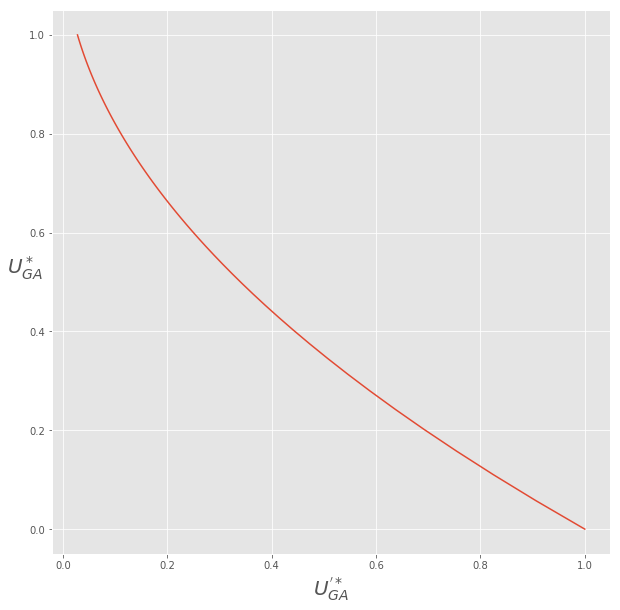

In [50]:
# I want the selection function to "wander" through 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
xs = np.linspace(0, 1, 100)
u_derivs = selection_functions.kirkpatrick_selection_derivative(xs, 6.0)
us = selection_functions.kirkpatrick_selection(xs, 6.0)
ax.plot(u_derivs, us)
ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
plt.show()